In [2]:
%load_ext autoreload
%autoreload 2

import sys; 
sys.path.insert(0, '../../esinet')
sys.path.insert(0, '../')

import numpy as np
from copy import deepcopy
from scipy.sparse.csgraph import laplacian
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr
import mne
from esinet import Simulation
from esinet.forward import get_info, create_forward_model
from esinet.util import unpack_fwd
from invert.cmaps import parula
pp = dict(surface='white', hemi='both')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
info = get_info(kind='biosemi16')
fwd = create_forward_model(info=info, sampling='ico3')

leadfield, pos = unpack_fwd(fwd)[1:3]
n_chans, n_dipoles = leadfield.shape
dist = cdist(pos, pos)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    3.6s remaining:    6.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    3.8s remaining:    2.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


Simulating data based on sparse patches.


100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

Using control points [7.26148425e-10 2.26485919e-09 4.11666137e-08]


For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with `pip install qdarkstyle`
No projector specified for this dataset. Please consider the method self.add_proj.


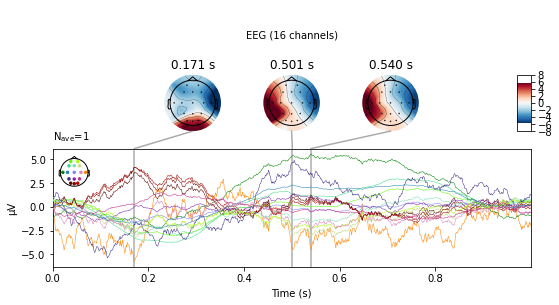

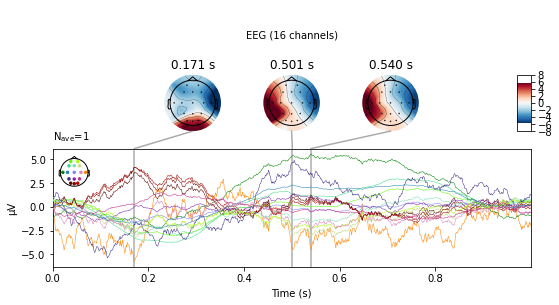

In [42]:
# settings = dict(number_of_sources=1, extents=40, duration_of_trial=0.01, target_snr=99999999999)
settings = dict(number_of_sources=4, extents=(1, 40), duration_of_trial=1, target_snr=1e99)

sim = Simulation(fwd, info, settings).simulate(2)
stc = sim.source_data[0]
evoked = sim.eeg_data[0].average()
y = evoked.data
x = stc.data

brain = stc.plot(**pp)
brain.add_text(0.1, 0.9, 'Ground Truth', 'title',
               font_size=14)
evoked.plot_joint()

# Algo

Preparing MNE
Preparing LORETA
Preparing S-Map
Preparing dSPM
Preparing REMBO
Preparing FISTA
Preparing LAURA
Simulating data based on sparse patches.


100%|██████████| 25/25 [00:00<00:00, 1388.38it/s]


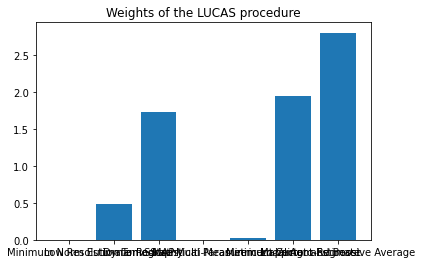

In [44]:
%matplotlib qt
from invert.solvers import SolverLUCAS
solver_names = ["MNE", "LORETA", "S-Map", "dSPM", "REMBO", "FISTA", "LAURA"]

solver = SolverLUCAS()
solver.make_inverse_operator(fwd, evoked, solvers=solver_names)
solver.optimize_weights(fwd, info, n_samples=25)
solver.plot_weights()

In [46]:
stc_hat = solver.apply_inverse_operator(evoked)
brain = stc_hat.plot(**pp)
brain.add_text(0.1, 0.9, solver.name, 'title',
               font_size=14)

Applying  Minimum Norm Estimate
Applying  Low Resolution Tomography
Applying  S-MAP
Applying  Dynamic Statistical Parametric Mapping
Applying  Reduce Multi-Measurement-Vector and Boost
Applying  Minimum Current Estimate
Applying  Local Auto-Regressive Average
Using control points [3.02926303e-10 3.32766920e-10 6.73459525e-10]
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with `pip install qdarkstyle`


Using control points [1.07420064e-10 1.11764886e-10 3.57668839e-10]
Using control points [6.51971689e-10 2.05259707e-09 3.34417463e-08]


Using control points [7.26148425e-10 2.26485919e-09 4.11666137e-08]
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with `pip install qdarkstyle`
Projections have already been applied. Setting proj attribute to True.


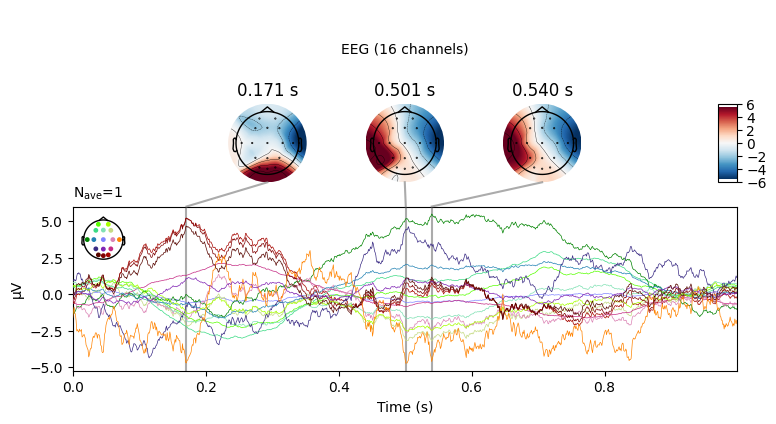

Using control points [1.07420064e-10 1.11764886e-10 3.57668839e-10]
Using control points [6.51971689e-10 2.05259707e-09 3.34417463e-08]
Using control points [1.49857962e-10 1.54497513e-10 5.01725471e-10]


In [48]:
brain = stc.plot(**pp)
brain.add_text(0.1, 0.9, 'Ground Truth', 'title',
               font_size=14)
evoked.plot_joint()